In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [3]:
spark = SparkSession.builder.appName("SVMExample").getOrCreate()

In [6]:
titanic_data = spark.read.csv("titanic.csv", header=True, inferSchema=True)

# Select features and target column
feature_columns = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
target_column = "Survived"

data = titanic_data.select(feature_columns + [target_column]).na.drop()


In [7]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

In [8]:
(train_data, test_data) = data.randomSplit([0.8, 0.2], seed=12345)

# SVM

In [9]:
svm = LinearSVC(maxIter=10, labelCol=target_column, featuresCol="features")
svm_model = svm.fit(train_data)

In [10]:
svm_predictions = svm_model.transform(test_data)

In [13]:
evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(svm_predictions)
print(f"Accuracy: {accuracy:.4f}")

evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(svm_predictions)
print(f"Precision: {precision:.4f}")

evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(svm_predictions)
print(f"Recall: {recall:.4f}")

evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(svm_predictions)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6220
Precision: 0.6354
Recall: 0.6220
F1-Score: 0.5879


# MLP

In [14]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

In [15]:
layers = [len(feature_columns), 6, 4, 2]  # Define the architecture (input, hidden layers, output)
mlp = MultilayerPerceptronClassifier(layers=layers, labelCol=target_column, featuresCol="features")


In [16]:
mlp_model = mlp.fit(train_data)

In [17]:
mlp_predictions = mlp_model.transform(test_data)


In [18]:
evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(mlp_predictions)
print(f"Accuracy: {accuracy:.4f}")

evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator.evaluate(mlp_predictions)
print(f"Precision: {precision:.4f}")

evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="weightedRecall")
recall = evaluator.evaluate(mlp_predictions)
print(f"Recall: {recall:.4f}")

evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol="prediction", metricName="f1")
f1 = evaluator.evaluate(mlp_predictions)
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6299
Precision: 0.6274
Recall: 0.6299
F1-Score: 0.6218


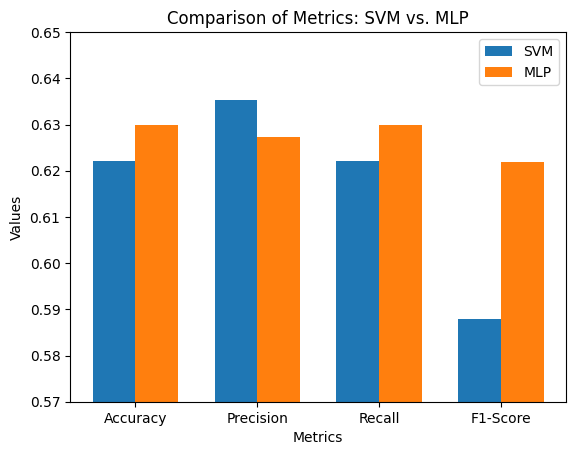

In [22]:
import matplotlib.pyplot as plt

# Results for SVM
svm_accuracy = 0.6220
svm_precision = 0.6354
svm_recall = 0.6220
svm_f1 = 0.5878

# Results for MLP
mlp_accuracy = 0.6299
mlp_precision = 0.6274
mlp_recall = 0.6299
mlp_f1 = 0.6218

# Metrics and models labels
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_metrics_values = [svm_accuracy, svm_precision, svm_recall, svm_f1]
mlp_metrics_values = [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1]

# Create a bar chart for comparison
width = 0.35
x = range(len(metrics))
plt.bar(x, svm_metrics_values, width, label='SVM')
plt.bar([i + width for i in x], mlp_metrics_values, width, label='MLP')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics: SVM vs. MLP')
plt.xticks([i + width/2 for i in x], metrics)
plt.ylim(0.57,0.65)
plt.legend()

plt.show()
